In [1]:
import cv2
import sys
import os
import math
import dlib
import glob
from skimage import io
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.color import rgb2gray, gray2rgb
from scipy import signal
from scipy.cluster.vq import kmeans,vq
from pylab import imread,imshow,show
import colorsys
from scipy import ndimage

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

In [2]:
fname = "Webp.net-resizeimage.jpg"
MODEL = "shape_predictor_68_face_landmarks.dat"


In [3]:
%matplotlib inline


# Identificador de pontos da face

In [4]:
def predict_shape(fname):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(MODEL)

    img = io.imread(fname)
    dets = detector(img, 1)

    for k, d in enumerate(dets): # should only detect one face
        shape = predictor(img, d)
        return shape

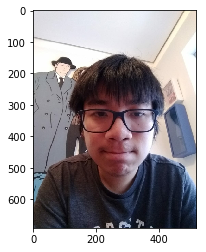

In [5]:
fname = "Webp.net-resizeimage.jpg"

im = Image.open(fname)

r =predict_shape(fname)
imshow(np.asarray(im))

In [6]:
image_drawer = ImageDraw.Draw(im)

(518, 691)

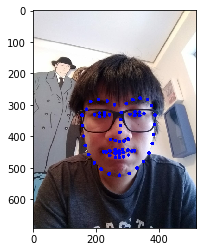

In [7]:
r.parts
for point in r.parts():
    image_drawer.ellipse((point.x-5, point.y-5,point.x+5, point.y+5), fill = 'blue', outline ='blue')
imshow(np.asarray(im))
im.size

# Desenhar formato da face

In [8]:
# Pontos importantes para o contorno da face 0, 3, 13, 16

(518, 691)

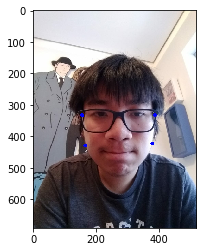

In [15]:
im = Image.open(fname)

image_drawer = ImageDraw.Draw(im)
list_p =[r.part(0), r.part(3), r.part(13), r.part(16)]
for point in list_p:
    image_drawer.ellipse((point.x-5, point.y-5,point.x+5, point.y+5), fill = 'blue', outline ='blue')
imshow(np.asarray(im))
im.size

In [18]:
image_drawer.line([(r.part(0).x, r.part(0).y), (r.part(3).x,r.part(3).y)], fill=(255,0,0), width =2)
image_drawer.line([(r.part(13).x, r.part(13).y), (r.part(16).x,r.part(16).y)], fill=(255,0,0), width =2)

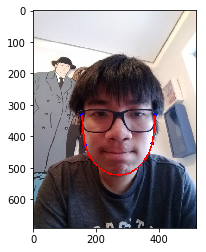

In [22]:
for i in range(1, 17):
    image_drawer.line([(r.part(i-1).x, r.part(i-1).y), (r.part(i).x,r.part(i).y)], fill=(255,0,0), width =5)
imshow(np.asarray(im))